In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats

%matplotlib inline

## Loads data and preprocess fields

In [3]:
df_vd_f = pd.read_feather("./yt_metadata_helper.feather")
df_ch_f = pd.read_csv("./df_channels_en.tsv.gz", compression="infer", sep="\t")
df_vd_f["dummmy"] = 1
df_ch_f["join_date"] = pd.to_datetime(df_ch_f["join_date"])

## 1. Video and channel statistics

In [4]:
np.unique(df_ch_f["category_cc"].astype(str))

array(['Autos & Vehicles', 'Comedy', 'Education', 'Entertainment',
       'Film and Animation', 'Gaming', 'Howto & Style', 'Music',
       'News & Politics', 'Nonprofits & Activism', 'People & Blogs',
       'Pets & Animals', 'Science & Technology', 'Sports',
       'Travel & Events', 'nan'], dtype=object)

In [5]:
np.unique(df_vd_f["categories"].astype(str))

array(['', 'Autos & Vehicles', 'Comedy', 'Education', 'Entertainment',
       'Film & Animation', 'Gaming', 'Howto & Style', 'Movies', 'Music',
       'News & Politics', 'Nonprofits & Activism', 'People & Blogs',
       'Pets & Animals', 'Science & Technology', 'Shows', 'Sports',
       'Travel & Events'], dtype=object)

In [6]:
df_vd_tech = df_vd_f[df_vd_f["categories"].isin(['Science & Technology', 'Education'])]
df_ch_tech = df_ch_f[df_ch_f['channel'].isin(df_vd_tech["channel_id"])]
display(df_ch_tech)
display(df_vd_tech)

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.0870
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.0870
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.0870
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.0870
14,Entertainment,2006-11-21,UCp0hYYBW6IMayGgR-WeoCvQ,TheEllenShow,34400000,10692,28.0,2.0870
...,...,...,...,...,...,...,...,...
136407,Music,2008-06-07,UCgpvsjvmvrplEbsZZR4P2qQ,skellygore,10000,71,991408.0,53.1435
136434,Entertainment,2016-12-08,UCHhADtMaBfxHgDWH4unda6w,Kool Khaizer,10105,13,995516.0,53.1435
136450,Comedy,2007-02-26,UC8sJrbwoTNhbbO_5MzxlAHQ,JediMaster362,10000,252,998847.0,53.1435
136454,Film and Animation,2010-02-11,UCCIRmHFcVvGyKndXMnJVvtg,EricVsEverything,10100,83,1005370.0,53.1435


,categories,channel_id,dislike_count,display_id,duration,like_count,upload_date,view_count,dummmy
185,Education,UCzWrhkg9eK5I8Bm3HfV-unA,3.0,jCaqrZ8gSkY,116,11.0,2016-05-03,2720.0,1
275,Education,UCzWrhkg9eK5I8Bm3HfV-unA,1094.0,VZ6_wQxKVSI,940,2884.0,2015-06-30,4530589.0,1
276,Education,UCzWrhkg9eK5I8Bm3HfV-unA,4.0,0CsvKzQNd7g,412,12.0,2015-06-20,18053.0,1
1671,Education,UCzWn_gTaXyH5Idyo8Raf7_A,2.0,WNR69JYddKA,156,68.0,2015-07-24,7758.0,1
1672,Education,UCzWn_gTaXyH5Idyo8Raf7_A,8.0,0alQMm9IOaI,1109,124.0,2015-07-17,7499.0,1
...,...,...,...,...,...,...,...,...,...
72907884,Education,UCrwEMKhsjY8P9-GuIKMYVrQ,174.0,QBQoRWIjkgg,2076,1579.0,2017-05-06,204985.0,1
72907886,Education,UCrwEMKhsjY8P9-GuIKMYVrQ,9.0,hftL1gF1wuU,866,94.0,2017-04-05,4275.0,1
72907906,Education,UCrwEMKhsjY8P9-GuIKMYVrQ,6.0,4bLIGxHlRho,1541,194.0,2017-02-05,18325.0,1
72907907,Education,UCrwEMKhsjY8P9-GuIKMYVrQ,17.0,IGXSM1knSE4,1474,103.0,2017-02-04,12222.0,1


In [7]:
# gets videos_yt count
df_vd_vid_count = dict(df_vd_tech.groupby("channel_id").count().display_id) 
df_ch_tech["videos_yt"] = df_ch_tech["channel"].apply(lambda x: df_vd_vid_count[x])

C:\Users\Zied\AppData\Local\Temp\ipykernel_19472\2126638670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ch_tech["videos_yt"] = df_ch_tech["channel"].apply(lambda x: df_vd_vid_count[x])


In [8]:
number_of_videos_per_channel = list(df_vd_vid_count.values())
print("The number of channels is", len(number_of_videos_per_channel)) 
print("The mean number of videos per channel is {}, the median is {}, the min is {} and the max is {}".format(np.mean(number_of_videos_per_channel), np.median(number_of_videos_per_channel), np.min(number_of_videos_per_channel), np.max(number_of_videos_per_channel)))

The number of channels is 33744
The mean number of videos per channel is 183.69393077287813, the median is 21.0, the min is 1 and the max is 60786


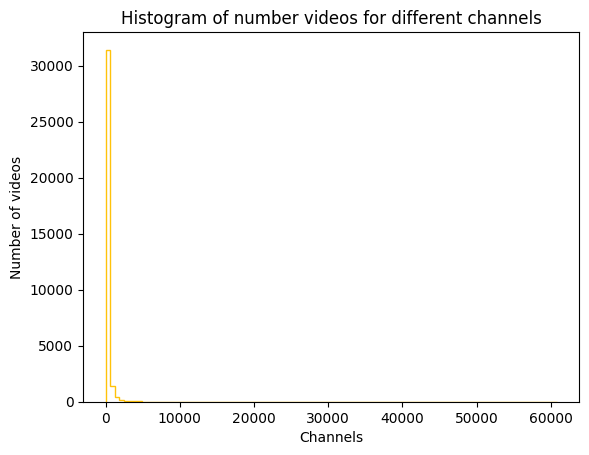

In [9]:
#Plot the histogram for number of videos per channel
vids = plt.hist(list(df_vd_vid_count.values()),
                     bins=100,
                     histtype='step',
                     color='#FFC20A')
plt.title(
    'Histogram of number videos for different channels')
plt.ylabel('Number of videos')
plt.xlabel('Channels')

#Show the plot
plt.show()

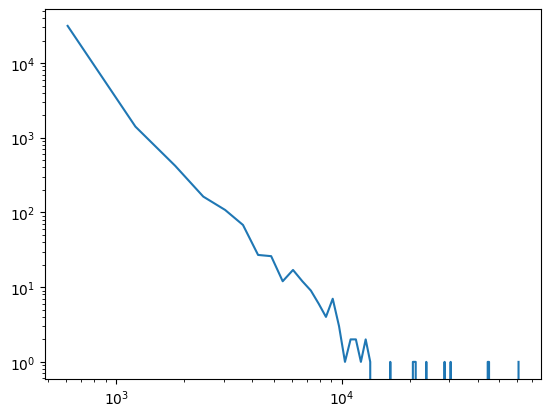

In [10]:
plt.loglog(vids[1][1:],vids[0])

In [11]:
number_of_likes = df_vd_tech["like_count"]
print("The mean number of likes for a youtube video is {}, the median is {}, the min is {} and the max is {}".format(np.mean(number_of_likes), np.median(number_of_likes), np.min(number_of_likes), np.max(number_of_likes)))

The mean number of likes for a youtube video is 818.2110170842708, the median is nan, the min is 0.0 and the max is 11432004.0


In [12]:
durations = df_vd_tech["duration"]
print("The mean length for a youtube video is {}, the median is {}, the min is {} and the max is {}".format(np.mean(durations), np.median(durations), np.min(durations), np.max(durations)))
df_vd_tech.query("duration>=7200")

The mean length for a youtube video is 837.5049859903125, the median is 344.0, the min is 1 and the max is 172801


,categories,channel_id,dislike_count,display_id,duration,like_count,upload_date,view_count,dummmy
11322,Science & Technology,UCzWA3ov9kcza5XxtHh-lM7Q,1.0,BWUyh4mc53w,7605,19.0,2019-02-08,526.0,1
27706,Education,UCzTvG9uItC9M19-d0oFXeug,1.0,LZx6uJa5ZOY,8611,41.0,2018-04-05,532.0,1
27744,Education,UCzTvG9uItC9M19-d0oFXeug,3.0,oekdWFRAAn0,8207,27.0,2018-03-17,389.0,1
27807,Education,UCzTvG9uItC9M19-d0oFXeug,2.0,bXfQDjRIrTs,7250,39.0,2018-01-17,485.0,1
32814,Education,UCzTWdr_9IVWWmeStz5qDjoA,46.0,wEsnFB_kacM,7234,844.0,2015-03-27,61801.0,1
...,...,...,...,...,...,...,...,...,...
72900746,Education,UCrwpQai5rQkhd2EckS9VaFA,18.0,W-vF91ZhpTU,7472,210.0,2019-02-07,5533.0,1
72900751,Education,UCrwpQai5rQkhd2EckS9VaFA,60.0,WXhVgJ-gMGg,8243,529.0,2019-01-31,14967.0,1
72900806,Education,UCrwooWpyfvigpL7kQS_Xc-A,1.0,TAOU6j0m9Rw,10802,11.0,2019-01-12,198.0,1
72900807,Education,UCrwooWpyfvigpL7kQS_Xc-A,1.0,3octev-QzlE,7200,6.0,2019-01-12,284.0,1


<Axes: xlabel='duration'>

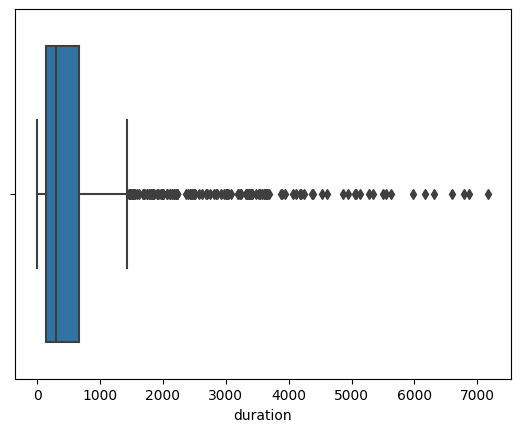

In [13]:
#only look at videos of length less than 7200 seconds, i.e. 2 hours
sns.boxplot(x=df_vd_tech.query("duration<7200")["duration"].sample(1000))

In [25]:
df_vd_tech = df_vd_tech[df_vd_tech["view_count"]!=0]
df_vd_tech["like_count_ratio"] = df_vd_tech['like_count']/df_vd_tech["view_count"]
stats.pearsonr(df_vd_tech.dropna()["duration"], df_vd_tech.dropna()['like_count_ratio'])

C:\Users\Zied\AppData\Local\Temp\ipykernel_19472\211520745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vd_tech["like_count_ratio"] = df_vd_tech['like_count']/df_vd_tech["view_count"]


(0.0018168177586832296, 9.696058980635078e-06)

In [28]:
stats.spearmanr(df_vd_tech.dropna()["duration"], df_vd_tech.dropna()['like_count_ratio'])

SpearmanrResult(correlation=0.25086585038801473, pvalue=0.0)

There is a small (0.0018), but significant (p < 0.05) positive correlation between the duration of a video and the number of likes it gets.

In [27]:
df_vd_tech["dislike_count_ratio"] = df_vd_tech['dislike_count']/df_vd_tech["view_count"]
stats.pearsonr(df_vd_tech.dropna()["duration"], df_vd_tech.dropna()['dislike_count_ratio'])

C:\Users\Zied\AppData\Local\Temp\ipykernel_19472\2444794570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vd_tech["dislike_count_ratio"] = df_vd_tech['dislike_count']/df_vd_tech["view_count"]


(-0.00011420381113456257, 0.7809515054319691)

In [29]:
stats.spearmanr(df_vd_tech.dropna()["duration"], df_vd_tech.dropna()['dislike_count_ratio'])

SpearmanrResult(correlation=0.11878760298718419, pvalue=0.0)

There is a small (0.15), but significant (p < 0.05) positive correlation between the duration of a video and the number of dislikes it gets.

Text(0.5, 0, 'Duration')

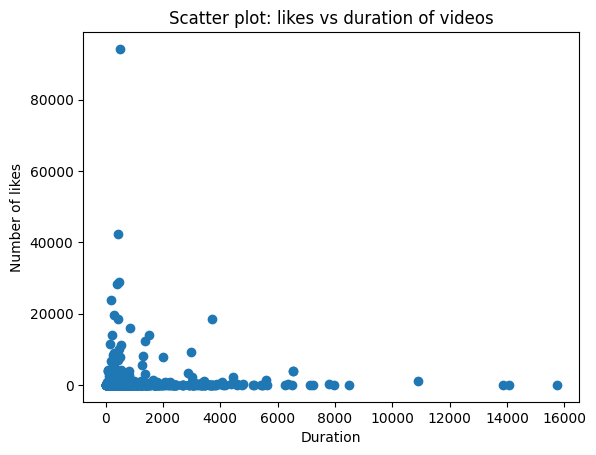

In [110]:
df_sample = df_vd_tech.dropna().sample(1000)
plt.scatter(df_sample["duration"], df_sample['like_count'])
plt.title(
    'Scatter plot: likes vs duration of videos')
plt.ylabel('Number of likes')
plt.xlabel('Duration')

We notice that there are no videos of long duration that get a high number of likes.

Text(0.5, 0, 'Duration')

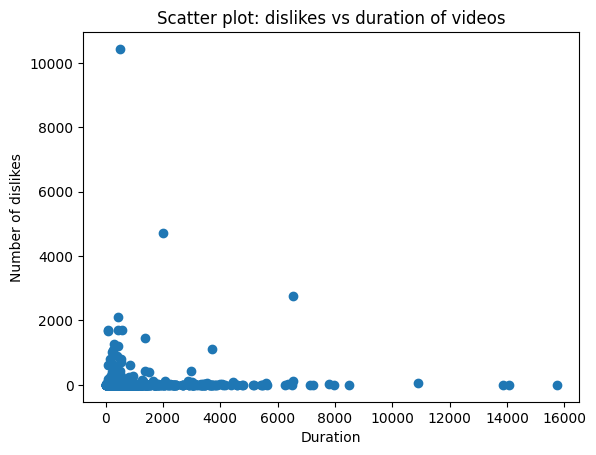

In [111]:
plt.scatter(df_sample["duration"], df_sample['dislike_count'])
plt.title(
    'Scatter plot: dislikes vs duration of videos')
plt.ylabel('Number of dislikes')
plt.xlabel('Duration')

In [131]:
df_vd_tech_modif = df_vd_tech.copy() 
df_vd_tech_modif["upload_date"] = df_vd_tech_modif.apply(lambda x: x["upload_date"].strftime("%Y"), axis=1)
df_vd_tech_modif_grouped = df_vd_tech_modif.groupby("upload_date")[["duration"]].mean()

In [137]:
df_vd_tech_modif_grouped.columns = ["average_duration"]

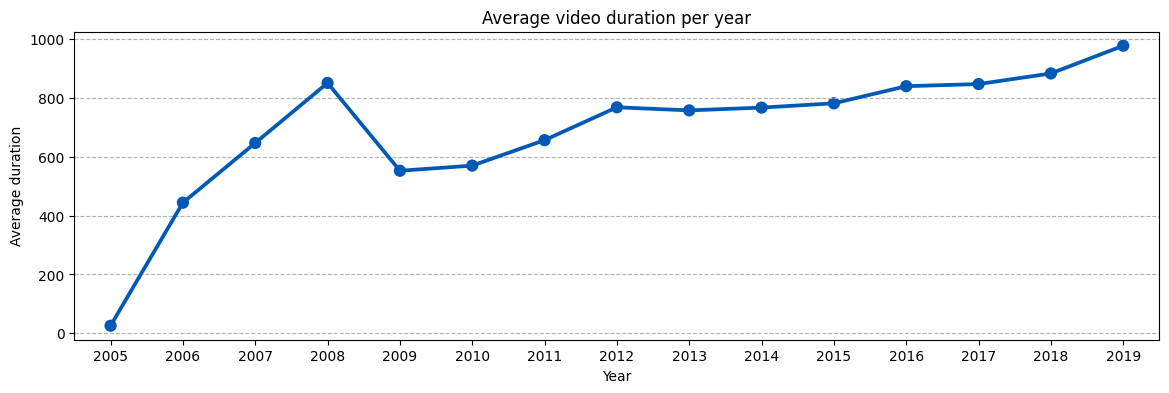

In [141]:
# Plot : Average video duration per year
# Set up the subplots with the figure size (14,4)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(14, 4))
sns.pointplot(x=df_vd_tech_modif_grouped.index,
              y='average_duration',
              errwidth=1.5,
              data=df_vd_tech_modif_grouped,
              ax=axes,
              color='#005AB5')
axes.set_title('Average video duration per year')
axes.set_ylabel('Average duration')
axes.set_xlabel('Year')
axes.grid(axis='y', linestyle='--')

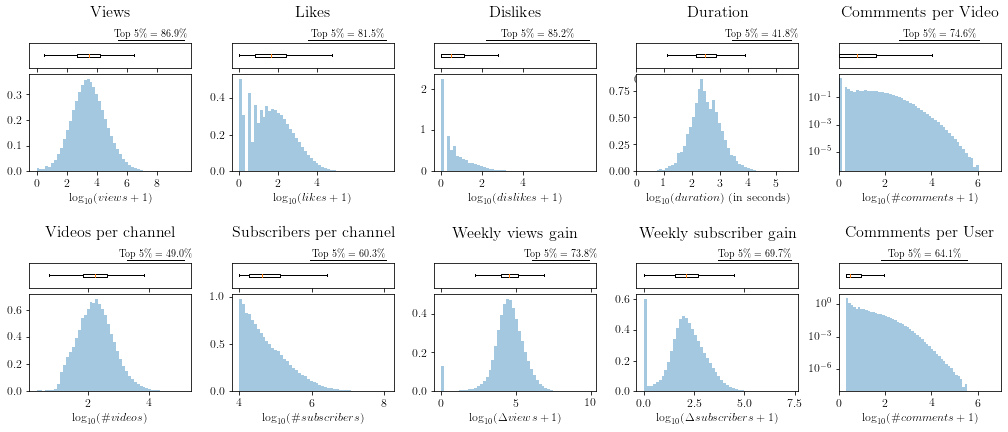

In [50]:
import matplotlib.transforms as transforms

fig, axs = plt.subplots(5, 5, figsize=(14, 6), 
                         gridspec_kw={"wspace": 0.25, "hspace": 0.1, 
                                      "height_ratios": [0.2, 0.8, 0.65, 0.2, 0.8]})
N = len(df_vd_f)#136470
    
kwargs = {'cumulative': False}

def plot_mean(ax, vals):
    trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
    trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
    quant95 = vals.quantile(0.95)
    quant100 = vals.quantile(1)
    plt.plot([np.log10(quant95), np.log10(quant100)], [1.15, 1.15], 
             lw=1, color = "black", transform=trans, clip_on=False)
    top5p = vals[vals >= quant95].sum() / sum(vals)
    plt.text((np.log10(quant95) + np.log10(quant100)) / 2, 1.25, 
             "Top $5\% = {}\%$".format(round(top5p*100,1)), ha="center",
        transform=trans, size=10)

def plot_box(ax, vals):
    trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
    ax.boxplot(np.log10(vals), showfliers=False, vert=False)
    ax.set_yticks([])
    
# Video stuff
df_tmp = df_vd_f.sample(N)
titles = ["Views", "Likes", "Dislikes", "Duration"]
cols = ["view_count", "like_count", "dislike_count", "duration"]
xlabels = [r'$\log_{10}(views + 1)$', r'$\log_{10}(likes + 1)$',
          r'$\log_{10}(dislikes + 1)$', r'$\log_{10}(duration)$ (in seconds)']
xticks = [[0, 2, 4, 6, 8], [0, 2, 4], [0, 2, 4], [0, 1, 2, 3, 4, 5]]

for idx, title in enumerate(titles):
    ax = axs[1, idx]
    sns.distplot(np.log10(df_tmp[cols[idx]] + 1), hist_kws=kwargs, kde=False, kde_kws=kwargs, ax=ax, norm_hist=True)
    ax.set_xlabel(xlabels[idx])
    ax.set_xticks(xticks[idx])
    xtickstmp = ax.get_xticks()
    xlimtmp = ax.get_xlim()
    
    ax = axs[0, idx]
    ax.set_title(title, pad=25, size=16)
    vals = df_tmp[cols[idx]].dropna() + 1
    plot_box(ax, vals)
    plot_mean(ax, vals)
    ax.set_xticks(xtickstmp)
    ax.set_xlim(xlimtmp)
    

## Views, Videos, Likes, Duration

In [91]:
df_vd_cat_count = df_vd_f.groupby("categories").sum()
df_vd_cat_count = df_vd_cat_count.drop(["", "Movies", "Shows"])
df_vd_cat_count[["dislike_count", "like_count"]] = df_vd_cat_count[["dislike_count", "like_count"]] / 1000000
df_vd_cat_count[["dummmy"]] = df_vd_cat_count[["dummmy"]] / 1000000
df_vd_cat_count[["view_count"]] = df_vd_cat_count[["view_count"]] / 1000000000
df_vd_cat_count[["duration"]] = df_vd_cat_count[["duration"]] / 3.154e+7
tmp = df_vd_cat_count.rename({"dislike_count": "# Dislikes (M)",
    "duration": "Duration (Years)",
    "like_count": "# Likes (M)",
    "view_count": "# Views (B)",
    "dummmy": "# Videos (M)"
    }, axis=1)[["# Views (B)", "# Videos (M)", "# Likes (M)", "Duration (Years)"]]
display(tmp)

,# Views (B),# Videos (M),# Likes (M),Duration (Years)
categories,,,,
Autos & Vehicles,123.094344,2.256967,956.300323,27.034161
Comedy,345.039111,1.172503,6134.162539,18.926862
Education,502.391835,3.795564,2881.361591,117.080173
Entertainment,2287.747785,12.276397,20140.552867,243.069061
Film & Animation,576.280807,2.359736,3737.846598,47.726916
Gaming,1042.503030,13.720303,17351.327104,623.167983
Howto & Style,420.666785,3.968127,5790.819053,73.645316
Music,2474.987208,8.305003,19270.464688,124.088194
News & Politics,158.642354,8.881022,1892.882798,144.766513


## Completeness of # videos

Text(0.5, 1.0, 'Completeness of videos per channel')

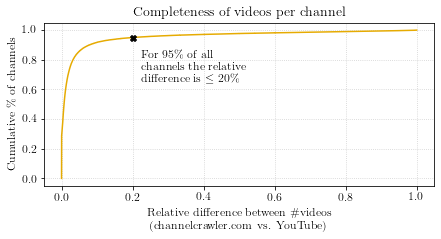

In [14]:
import scipy.stats as stats
fig, ax = plt.subplots(1, 1, figsize=(7, 3), sharex=False, gridspec_kw={"wspace": 0.30})
x = abs(df_ch_f["videos_yt"] - df_ch_f["videos_cc"]) / pd.concat([df_ch_f["videos_yt"], 
                                                                  df_ch_f["videos_cc"]], axis=1).max(axis=1)


x = sorted(x)
p = 1. * np.arange(len(x))/(len(x) - 1)
p95 = abs(p - 0.95).argmin()
ax.plot(x, p, color="#e6ab02")
ax.scatter([x[p95]], [p[p95]], zorder=10, color="black", marker="X")
ax.text(x[p95] + 0.025, p[p95] -0.0825, 
        "For 95\% of all \n channels the relative  \n difference is $\leq$ 20\%", va="top")
ax.xaxis.grid(color="#CCCCCC", ls=":")
ax.yaxis.grid(color="#CCCCCC", ls=":")
ax.set_ylabel("Cumulative \% of channels")
ax.set_xlabel(r'Relative difference between \#videos' + '\n(channelcrawler.com vs. YouTube)')
ax.set_title("Completeness of videos per channel")

In [40]:
d={'k1':3, 'k2':5}
np.sum(list(d.values()))

8

In [ ]:
#naive bayes classifier with laplace-smoothing
def naive_bayes(dict_good, dict_bad, title):
    '''dict_good: python dict, contains, as keys, all words from the tech review videos' titles (smoothed; i.e. we add to it all words
    that aren't initially in it but are among words in all titles when considering all videos) and, as values, the frequency of the word
    (probability; i.e. # of occurences of the word/(# of occurences of all words + smoothing factor*N)); for words that weren't initially present, 
    we assign to them smoothing factor/(# of occurences of all words + smoothing factor*N)
    smoothing factor is chosen to be 1. 
    N is the number of words that are added (initially not among the words from the titles of tech review videos)
    
    dict_bad: same idea as dict good, but contains all other words that aren't in the titles of tech review videos (also smoothed) 
    title: list: the words of the title of a video to which we want to get its score
    
    returns: 
    title's score; we can compare this score to 0.5, if it's larger then it's likely "good" else it's considered "bad"
    '''
    
    proba_good = np.sum(list(dict_good.values()))/(np.sum(list(dict_good.values()))+np.sum(list(dict_bad.values())))
    proba_bad = np.sum(list(dict_bad.values()))/(np.sum(list(dict_good.values()))+np.sum(list(dict_bad.values())))
    
    prob_title_given_good = 1
    prob_title_given_bad = 1
    for w in title:
        prob_title_given_good *= dict_good[w]
        prob_title_given_bad *= dict_bad[w]
        
    score = (prob_title_given_good * proba_good)/(prob_title_given_good * proba_good + prob_title_given_bad * proba_bad)
    
    return score